# DASC 5300, spring 2023, University of Texas at Arlington
# Programming Assignment 1


## **Academic Honesty**
This assignment must be done individually and independently. You must implement the whole assignment by yourself. Academic dishonesty is not tolerated.

## **Requirements**

1.   When you work on this assignment, you should make a copy of this notebook in Google Colab. This can be done using the option `File > Save a copy in Drive` in Google Colab. 
2.   You should fill in your answer for each task inside the code block right under the task. 
3.   You should only insert your code into the designated code blocks, as mentioned above. Other than that, you shouldn't change anything else in the notebook.

5.  Most of the tasks can be solved with 1 line of code. But you are allowed to use up to 3 lines of code for any task (except Task 10 for which your answer can be longer). 
6.   You may not use any other imports to solve the tasks. In other words, you shouldn't use `import` in any designated code blocks for the tasks.
7.   You should not use any loops, if statement, or list/dictionary comprehensions, except for Task 10. You can solve all the tasks by only using features and functions from pandas you can get help from this link (https://colab.research.google.com/drive/1MvwenCCfMAUL6ZNzh_BlK_JVG3qdUIzr?usp=sharing)
8.   Even if you can only partially solve a task, you should include your code in the code block, which allows us to consider partial credit. 
9.   However, your code should not raise errors. Any code raising errors will not get partial credit. 
10.   vehicule_share.csv,task5.pkl and task9.pkl are the files that  will be used in the assigment1 and their link is in DataSet in modules section in canvas.https://drive.google.com/drive/folders/1hnymJoBCzZdP_B-x4ISb7z4I4BMS2s8T?usp=sharing)
11.   To submit your assignment, download your Colab into a .ipynb file. This can be done using the option `Download > Download .ipynb` in Google Colab.
12.   Submit the downloaded .ipynb file/ .zip into the Programming Assignment 1  entry in Canvas.


## **Dataset**

In this assignment, we will do data munging and analysis on a dataset about vehicle sharing. You can run the following code to download the dataset and load it into a `DataFrame` `trips`.

This dataset is generated from a vehicle sharing service. Every row represents a trip and has the following columns: 
- *Start Time* - The time when the trip started
- *End Time* - The time when the trip ended
- *Trip Duration* - Total time duration (in seconds) of the trip
- *Start Station* - Name of the trip's start station
- *End Station* - Name of the trip's end station
- *User Type* -  Type of the user. **Subscriber** refers to the users that subscribed to the service; **Customer** refers the users who take rides without any subscription. 
- *Birth Year* - The birth year of the user

In [3]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd

from itertools import chain

#For visualization. Matplotlib for basic visualization and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns




In [120]:
#load the file  vehicle_share.csv into a dataframe trips
a = pd.read_csv('vehicle_share.csv')
#return the first 5 rows of the dataset
a.head()

,ID,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
0,955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610.0,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992.0
1,961916,2017-05-26 09:41:44,2017-05-26 09:46:25,281.0,Ashland Ave & Lake St,Wood St & Hubbard St,Subscriber,Female,1983.0
2,1023296,2017-05-30 15:46:18,2017-05-30 15:52:12,354.0,Larrabee St & Kingsbury St,Clark St & Elm St,Subscriber,Male,1985.0
3,958716,2017-05-25 22:59:33,2017-05-25 23:07:19,466.0,Clark St & Armitage Ave,Sheffield Ave & Wrightwood Ave,Subscriber,Female,1985.0
4,718598,2017-05-03 13:20:38,2017-05-03 13:31:13,635.0,Ada St & Washington Blvd,Daley Center Plaza,Subscriber,Male,1967.0


Let's gain some basic understanding of the dataset

In [121]:
#For each task below, look for a Pandas function to do the task.
a = pd.read_csv('vehicle_share.csv')

#Task a: Print the details of the df_data data frame (information such as dimensionality, names of features (note that there's no target variable here), statistical details, etc)
a.info()

#Task b: Print the Name of the trip's end station used in the dataset with the number of their occurences
a['End Station'].value_counts

#Task c: Print the number of duplicated rows in the dataset and remove the duplicated rows
a.drop_duplicates(inplace= True)
print("Number of rows after removing duplicates:", len(t))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191963 entries, 0 to 191962
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             191963 non-null  int64  
 1   Start Time     191963 non-null  object 
 2   End Time       191963 non-null  object 
 3   Trip Duration  191963 non-null  float64
 4   Start Station  191963 non-null  object 
 5   End Station    191963 non-null  object 
 6   User Type      191963 non-null  object 
 7   Gender         110287 non-null  object 
 8   Birth Year     110501 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 13.2+ MB
Number of rows after removing duplicates: 191963


## **Need for data cleaning and preprocessing**

The results of these several functions indicate a few needs for cleaning and preprocessing the data:

1) The column `Birth Year` should be integer, but it has floating point values.

2) There are null values in a few columns. 

3) The values in columns `Start Time` and `End Time` are strings. We need to convert them to `datetime` values.


Let's find out which columns have null values. This could be derived from the `Non-Null Count` in the output of `trips.info()`. But there are simpler ways.

## **Task 1: For each column, find the number of rows with null value in that column.** 

If your code for this task is correct, its output should tell you that two columns have null values --- column `Gender` has missing value in 81676 rows and 81462 for column `Birth Year`. Other columns have no null values. 

In [119]:
# Code for Task 1
a_data = pd.read_csv('vehicle_share.csv')
# to find the number of values
null_val = a.isnull().sum()
print(null_val)

ID                   0
Start Time           0
End Time             0
Trip Duration        0
Start Station        0
End Station          0
User Type            0
Gender           81676
Birth Year       81462
Strt Time            0
dtype: int64




The `ID` column is not useful in our analysis. Hence, let's take it out. 

## **Task 2: Remove the `ID` column from the DataFrame `trips`.**

In [122]:
# Code for Task 2
a = a.iloc[:,1:]

## **Task 3: Replace null values in column `Gender` by `'Unknown'`. Replace null values in column `Birth Year` by -1. Note that this task has two desiganated code blocks.** 

The column `Gender` has Null values, as `trips.describe()` shows. Hence, we are using a string `Unknown` to indicate that the user's gender information is not recorded. The column `Birth Year` has Null values too. We thus use -1 to indicate missing values in `Birth Year`.

In [123]:
# Code for Task 3 : code block for replacing null values in column Gender by ``Unknown``.
a.loc[a['Gender'].isnull(), 'Gender'] = 'Unnknown'

In [124]:
# Code for Task 3: code block for replacing null values in column Birth Year by -1.
a.loc[a['Birth Year'].isnull(), 'Birth Year'] = 'Unnknown'

## **Task 4: Convert the data type of column ``Birth year`` to integer. Convert the data type of column ``Start Time`` and ``End Time`` to `datetime`.  Note that this task has two designated code blocks.**

In [126]:
# Code for Task 4: code block for converting the data type of column ``Year Pubblished`` to integer.
a.loc[:, 'Birth Year'] = pd.to_numeric(a.loc[:, 'Birth Year'], errors='ignore')

In [127]:
# Code for Task 4: code block for converting the data type of column ``Start Time`` and ``End Time`` to ``datetime``. 
a= pd.read_csv('vehicle_share.csv')
a['Strt Time'] = pd.to_datetime(a['Start Time'])
a['End Time'] = pd.to_datetime(a['End Time'])


Run the following code cell so that, even if your code in preceding tasks messed up the data, it will not affect the ensuing tasks.

In [12]:
import pandas as pd
#load the file  task5.pkl into a dataframe trips
b = pd.read_pickle('task5.pkl')



We want to find out which gender of users used the vehicle sharing service more often.

## **Task 5: Get the frequency of trips for both the Genders.**

Male       82335
Unknown    81676
Female     27952
Name: Gender, dtype: int64


Text(0.5, 1.0, 'trips for both')

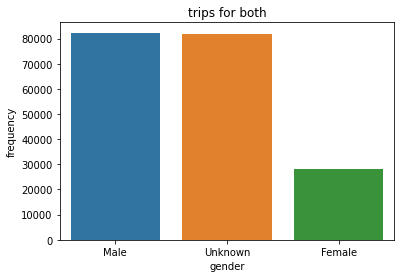

In [128]:
# Code for Task 5
## Task 5-1: Get the frequency of trips for both the  Genders.
gender_b = b['Gender'].value_counts()
print(gender_b)
# Task 5-2 Display the pie chart that represents the percentage (%) of trips for each Genders and display percentages in legend respectively
sns.barplot(x=gender_b.index, y=gender_b.values)
plt.xlabel('gender')
plt.ylabel('frequency')
plt.title('trips for both')

## **Task 6: Get the number of trips with each station as the starting point. Sort the start stations by frequency of trips, in descending order.**

If you get the correct code, you will find that for 1719 trips `Streeter Dr & Grand Ave` is the `Starting Station`, which is the most among all stations. 

In [16]:
# Code for Task 6
import pandas as pd
# Load the pickle file
b = pd.read_pickle('task5.pkl')
# Sort start stations by frequency of trips
sort_strtstat = b.groupby('Start Station').size().sort_values(ascending=False)
# get num of trips for each strt station
print(sort_strtstat)

Start Station
Streeter Dr & Grand Ave             1719
Lake Shore Dr & Monroe St           1211
Lincoln Memorial                    1112
Jefferson Dr & 14th St SW           1042
Columbus Circle / Union Station     1011
                                    ... 
Bressler                               1
Morgan St & Pershing Rd                1
Westpark Dr & Leesburg Pike            1
White House [17th & State Pl NW]       1
Racine Ave & 65th St                   1
Length: 1616, dtype: int64



## **Task 7: Find the longest trip (in seconds) in our dataset.**


In [17]:
# Code for Task 7
b = pd.read_pickle('task5.pkl')
# Find the longest trip in seconds
longest_t = b['Trip Duration'].max()
print("The longest trip in seconds is:", longest_t)

The longest trip in seconds is: 885567.6070000001


## **Task 8: Find the start station and end staion for the longest trip.**

If your code is correct, it should show the start and the end stations are __19th St & Constitution Ave NW__ and __23rd & E St NW__, respectively.

In [18]:
# Code for Task 8
b = pd.read_pickle('task5.pkl')
# get row of  longest trip
longest_t = b.sort_values(by='Trip Duration', ascending=False).iloc[0]
# get the start and end stations
(strt_statn,end_statn) = (longest_t['Start Station'],longest_t['End Station'])
print(f"Start Station: {strt_statn}",f"End Station: {end_statn}")

Start Station: 19th St & Constitution Ave NW End Station: 23rd & E St NW 


<Axes: xlabel='Trip Duration (min)', ylabel='count'>

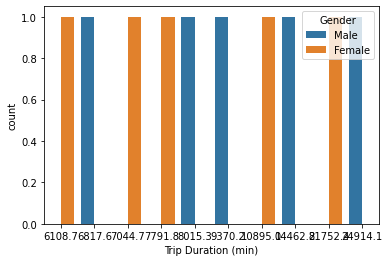

In [156]:
#Display the countplot of  the  5 top  Trip Duration for each gender
b_gender = a.loc[a['Gender'] != 'Unknown']
# creating a new column with trip duration 
b_gender.loc[:, 'Trip Duration (min)'] = b_gender['Trip Duration'] / 10
#  top 5 longest trip durations for male and female
top5_male = b_gender.loc[b_gender['Gender'] == 'Male'].nlargest(5, 'Trip Duration (min)')
top5_female = b_gender.loc[b_gender['Gender'] == 'Female'].nlargest(5, 'Trip Duration (min)')
# concating 2 dataframes
top5 = pd.concat([top5_male, top5_female])
# countplot
sns.countplot(x='Trip Duration (min)', hue='Gender', data=top5)

We want to analyze the user base of the vehicle sharing service, especially their age. For that let's create an `Age` column based on `Birth Year`. Since the trips all took place in May 2017, we should calculate the users' ages then (i.e., 2017) instead of now.

## **Task 9: Create a column `Age` using `Birth Year`.**




In [117]:
# Code for Task 9
c = pd.read_pickle('task9.pkl')
# Calculate the age of users at the time of the trip
c['Age'] = 2017 - c['Birth Year']
# Print the first 5 rows of the data with the new Age column
print(c.head())

           Start Time            End Time  Trip Duration  \
0 2017-05-25 18:19:03 2017-05-25 18:45:53         1610.0   
1 2017-05-26 09:41:44 2017-05-26 09:46:25          281.0   
2 2017-05-30 15:46:18 2017-05-30 15:52:12          354.0   
3 2017-05-25 22:59:33 2017-05-25 23:07:19          466.0   
4 2017-05-03 13:20:38 2017-05-03 13:31:13          635.0   

                Start Station                     End Station   User Type  \
0         Theater on the Lake    Sheffield Ave & Waveland Ave  Subscriber   
1       Ashland Ave & Lake St            Wood St & Hubbard St  Subscriber   
2  Larrabee St & Kingsbury St               Clark St & Elm St  Subscriber   
3     Clark St & Armitage Ave  Sheffield Ave & Wrightwood Ave  Subscriber   
4    Ada St & Washington Blvd              Daley Center Plaza  Subscriber   

   Gender  Birth Year  Age  
0  Female        1992   25  
1  Female        1983   34  
2    Male        1985   32  
3  Female        1985   32  
4    Male        1967   50  


In Task 3 we replaced null values in `Birth Year` with -1. Some of the `Age` values thus incorrectly become 2018. We need to replace them with -1 again.

In [118]:
c['Age'] = c['Age'].replace(2018, -1)

Run the following code cell so that, even if your code in preceding tasks messed up the data, it will not affect the ensuing tasks.

In [39]:
import pandas as pd
#load the file task9.pkl into a dataframe trips
c = pd.read_pickle('task9.pkl')

Now let's create a categorical feature `Age Group` based on `Age`. We can discretize `Age` into `Child` (for 00-14 years old), `Youth` (for 14-24 years old), `Adult` (for 24-64 years old), and `Senior` (64 years and over). We should set the value of `Age Group` to a string `N/A` if the `Age` value is -1. In every category range, the starting point is inclusive and the endpoint is exclusive. For instance, the `Child` group is for those with `Age` >= 0 and `Age` < 14.

## **Task 10: Create a column `Age Group` and assign string values in this column based on `Age` according to the above description.**

In [40]:
# Code for Task 10
def age_group(a):
    if a == -1:
        return 'N/A'
    elif a < 14:
        return 'Child'
    elif a < 24:
        return 'Youth'
    elif a < 64:
        return 'Adult'
    else:
        return 'Senior'
# Applying age_group function to create the Age Group column
c['Age Group'] = c['Age'].apply(age_group)

In [41]:
c['Age Group'].value_counts()

Adult     103364
N/A        81462
Youth       4635
Senior      2501
Child          1
Name: Age Group, dtype: int64

Run the following code cell so that, even if your code in preceding tasks messed up the data, it will not affect the ensuing tasks.

In [42]:
import pandas as pd
#load the file task10.pkl into a dataframe trips
d = pd.read_pickle('task10.pkl')


Our next task attempts to examine the relationship between `Age Group` and average trip time.

## **Task 11: For each value of `Age Group` (except for `N/A`), find the average `Trip Duration`.**

In [115]:
# Code for Task 11-1
d = pd.read_pickle('task10.pkl')
# finding average of Age Group and calculating Trip Duration using mean function
age_groups = d.groupby('Age Group')['Trip Duration'].mean()
print(age_groups)

Age Group
Adult      765.169711
Child      639.000000
N/A       1459.034288
Senior     784.281887
Youth      740.381014
Name: Trip Duration, dtype: float64


Text(0.5, 1.0, 'Count of Trip Duration for each Age Group')

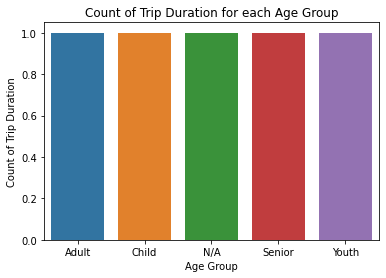

In [134]:
_# Code for Task 11-2
#Display the countplot of  the average Trip Duration for each Age Group
age_groups = d.groupby('Age Group')['Trip Duration'].mean().reset_index()
#creating countplot
sns.countplot(x='Age Group', data=age_groups)
#plot x and y labels and also title
plt.xlabel('Age Group')
plt.ylabel('Count of Trip Duration')
plt.title('Count of Trip Duration for each Age Group')

## **Task 12: Produce a pivot table of number of trips, using `Gender` for rows and `User type` for columns. Exclude the trips from users whose gender is `Unknown`.**


In [151]:
# Code for Task 12 
#removing unknown values in gender column
d = d[d['Gender'] != 'Unknown']
#produce a pivot table of number of trips using Gender for rows and User Type for columns
d_counts = pd.pivot_table(d, index='Gender', columns='User Type', values='Trip Duration', aggfunc='count', fill_value=0)
d_counts

User Type,Customer,Subscriber
Gender,,
Female,475,27477
Male,895,81440
Unnknown,39736,41940


## **Task 13: Get the average `Trip Duration` for each day of a week. The results should be sorted by average trip duration.**

To decide the day of a trip, we only consider the trip's start time. For instance, if a trip starts on Monday, it is a Monday trip, regardless of when it ends. 



In [178]:
# Code for Task 13-1
# convert the 'Start Time' column to datetime
d['Start Time'] = pd.to_datetime(t['Start Time'])
# extract the day of week from the 'Start Time' column
d['Day of Week'] = d['Start Time'].dt.day_name()
# calculate the average trip duration for each day of the week
avg_duration_by_day = d.groupby('Day of Week')['Trip Duration'].mean()
# print the average trip duration for each day of the week
avg_duration_by_day

Day of Week
Friday        964.368331
Monday       1092.311058
Saturday     1344.448537
Sunday       1382.117428
Thursday      898.084620
Tuesday       918.600529
Wednesday     940.540680
Name: Trip Duration, dtype: float64

Text(0.5, 1.0, 'Average Trip Duration for each day of Week')

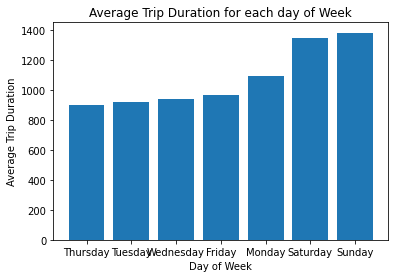

In [179]:
# Code for Task 13-2
#Display the countplot of  the average Trip Duration for each day of a week
#Calculate avg trip duration for each day of the week
avg_duration_by_day = d.groupby('Day of Week')['Trip Duration'].mean().reset_index()
#sorting by avg trip duration in ascending order
avg_duration_by_day = avg_duration_by_day.sort_values(by='Trip Duration')
#creating countplot
plt.bar(avg_duration_by_day['Day of Week'], avg_duration_by_day['Trip Duration'])
plt.xlabel('Day of Week')
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration for each day of Week')

## **Task 14: Get the three most popular trip routes, in terms of `Start Station` and `End Station`**


In [176]:
# Code for Task 14-1
# group Start Station and End Station 
pop_routes = d.groupby(['Start Station', 'End Station']).size()
# sort num of trips in descending order
pop_routes = pop_routes.sort_values(ascending=False)
# get 3 most popular routes
pop_routes = pop_routes[:3]
pop_routes

Start Station              End Station              
Lake Shore Dr & Monroe St  Streeter Dr & Grand Ave      255
Streeter Dr & Grand Ave    Streeter Dr & Grand Ave      172
Lake Shore Dr & Monroe St  Lake Shore Dr & Monroe St    165
dtype: int64

                   Start Station                End Station  Count
51669  Lake Shore Dr & Monroe St    Streeter Dr & Grand Ave    255
70942    Streeter Dr & Grand Ave    Streeter Dr & Grand Ave    172
51625  Lake Shore Dr & Monroe St  Lake Shore Dr & Monroe St    165


<Axes: xlabel='Start Station', ylabel='count'>

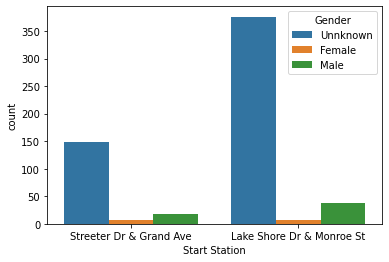

In [177]:
# Task 14: Get the three most popular trip routes, in terms of Start Station and End Station
# Get the three most common start and end stations
pop_routes = d.groupby(['Start Station', 'End Station']).size().reset_index(name='Count').nlargest(3, 'Count')
# Print the top routes
print(pop_routes)

# Task 14-3: Display the countplot of the three most popular trip routes more often for  each of the genders 
# top 3 most popular trip routes
pop3_routes = d.groupby(['Start Station', 'End Station']).size().reset_index(name ='Count').nlargest(3, 'Count')
# filtering unknown genders
gender = top3.loc[top3['Gender'] != 'Unknown']
# plotting the countplot
sns.countplot(x='Start Station', hue='Gender', data=gender)

